In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression

import sys
sys.path.append("..")
from generative_models import utils

/home/luca/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def split_data(data, split, targets):
    split_index = int(data.shape[0]*split)
    train = data[split_index:, :]
    test = data[:split_index, :]
    
    x_train = train[:, :-targets]
    y_train = train[:, -targets:]
    x_test = test[:, :-targets]
    y_test = test[:, -targets:]
    
    return (x_train, y_train), (x_test, y_test)

In [7]:
timesteps = 90
elements = 50000
split = 0.3
targets = 20

generated_data_filepaths = ['../generative_models/wgan_gp/outputs/final/packing/generated_datasets/100000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/packing/generated_datasets/200000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/packing/generated_datasets/300000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/packing/generated_datasets/400000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/packing/generated_datasets/500000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/packing/generated_datasets/600000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/packing/generated_datasets/700000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/packing/generated_datasets/800000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/packing/generated_datasets/900000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/packing/generated_datasets/1000000_generated_data.npy']
transactions_filepath = '../../datasets/berka_dataset/usable/normalized_transactions_months.npy'


real_data = utils.load_splitted_dataset(transactions_filepath, timesteps)
np.random.shuffle(real_data)
real_data = real_data[:elements]
(x_train_real, y_train_real), (x_test_real, y_test_real) = split_data(real_data, split, targets)

## Packing

## Linear Regression

real_data score:  0.3132702874302747
generated_data score:  0.2830008341947173
generated_data score:  0.33212864224489125
generated_data score:  0.2793742711071673
generated_data score:  0.27132879545974015
generated_data score:  0.25486309012344266
generated_data score:  0.23148288674379916
generated_data score:  0.29920165745550276
generated_data score:  0.3286749030382857
generated_data score:  0.2764471002765682
generated_data score:  0.3346129603476526


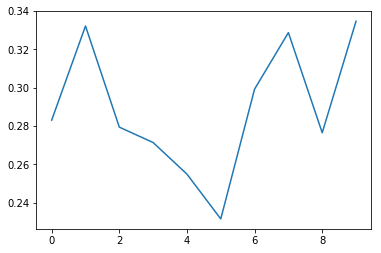

In [8]:
regressor = LinearRegression()
regressor.fit(x_train_real, y_train_real)
print('real_data score: ', regressor.score(x_test_real, y_test_real))

scores = []

for filepath in generated_data_filepaths:
    generated_data = np.load(filepath)[:elements]
    (x_train, y_train), (x_test, y_test) = split_data(generated_data, split, targets)
#     regressor.fit(x_train, y_train)
    score = regressor.score(x_test, y_test)
    scores.append(score)
    print('generated_data score: ', score)
    
plt.plot(scores)
plt.show()

## Ridge Regression

real_data score:  0.3132920834028385
generated_data score:  0.8307685169938587
generated_data score:  0.8369308873994524
generated_data score:  0.6955363941790836
generated_data score:  0.6476764891711944
generated_data score:  0.604920603094146
generated_data score:  0.6040819919239214
generated_data score:  0.600411627935054
generated_data score:  0.6238285349250123
generated_data score:  0.5878637523283939
generated_data score:  0.6125930544322926


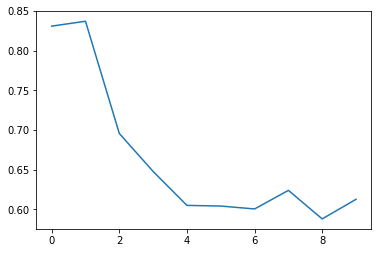

In [9]:
regressor = Ridge()
regressor.fit(x_train_real, y_train_real)
print('real_data score: ', regressor.score(x_test_real, y_test_real))

scores = []

for filepath in generated_data_filepaths:
    generated_data = np.load(filepath)[:elements]
    (x_train, y_train), (x_test, y_test) = split_data(generated_data, split, targets)
    regressor.fit(x_train, y_train)
    score = regressor.score(x_test, y_test)
    scores.append(score)
    print('generated_data score: ', score)
    
plt.plot(scores)
plt.show()

## Polynomial Regression

real_data score:  -86.31945431133074
generated_data score:  -0.11597622743283106
generated_data score:  -0.17406110071137637
generated_data score:  -0.18750193446202834
generated_data score:  -0.06566705702331364
generated_data score:  -0.08692286868046523
generated_data score:  -0.018871690476561804
generated_data score:  -0.003960795451717969
generated_data score:  0.07855471728096364
generated_data score:  0.07253513409969531
generated_data score:  0.6254749264733213


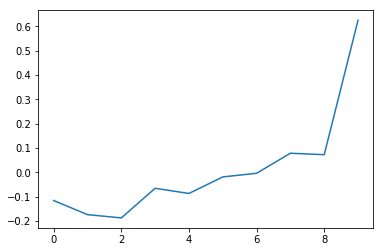

In [8]:
degree = 2
elements = 10000

real_data = utils.load_splitted_dataset(transactions_filepath, timesteps)
np.random.shuffle(real_data)
real_data = real_data[:elements]
(x_train_real, y_train_real), (x_test_real, y_test_real) = split_data(real_data, split, targets)

linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=degree)
x_train_real_ = polynomial_features.fit_transform(x_train_real)
linear_regressor.fit(x_train_real_, y_train_real)
x_test_real_ = polynomial_features.fit_transform(x_test_real)
print('real_data score: ', linear_regressor.score(x_test_real_, y_test_real))

scores = []
for filepath in generated_data_filepaths:
    generated_data = np.load(filepath)[:elements]
    (x_train, y_train), (x_test, y_test) = split_data(generated_data, split, targets)
    x_train_ = polynomial_features.fit_transform(x_train)
    linear_regressor.fit(x_train_, y_train)
    x_test_ = polynomial_features.fit_transform(x_test)
    score = regressor.score(x_test, y_test)
    scores.append(score)
    print('generated_data score: ', score)
    
plt.plot(scores)
plt.show()

In [26]:
generated_data_filepaths = ['../generative_models/wgan_gp/outputs/final/2018-06-12_18-48-18/generated_datasets/100000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-12_18-48-18/generated_datasets/200000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-12_18-48-18/generated_datasets/300000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-12_18-48-18/generated_datasets/400000_generated_data.npy',
                            '../generative_models/wgan_gp/outputs/final/2018-06-12_18-48-18/generated_datasets/500000_generated_data.npy']

real_data score:  0.3132217744407411
generated_data score:  0.8154293851521182
generated_data score:  0.7384873568778895
generated_data score:  0.7104108343299006
generated_data score:  0.6984453481523812
generated_data score:  0.6973100410615422


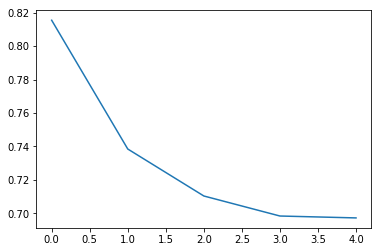

In [27]:
regressor = LinearRegression()
regressor.fit(x_train_real, y_train_real)
print('real_data score: ', regressor.score(x_test_real, y_test_real))

scores = []

for filepath in generated_data_filepaths:
    generated_data = np.load(filepath)[:elements]
    (x_train, y_train), (x_test, y_test) = split_data(generated_data, split, targets)
    regressor.fit(x_train, y_train)
    score = regressor.score(x_test, y_test)
    scores.append(score)
    print('generated_data score: ', score)
    
plt.plot(scores)
plt.show()

real_data score:  0.3132422674020783
generated_data score:  0.815306270831702
generated_data score:  0.7385518209146623
generated_data score:  0.7104361924229847
generated_data score:  0.6983627962890538
generated_data score:  0.6972706302423289


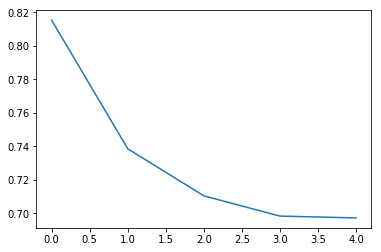

In [28]:
regressor = Ridge()
regressor.fit(x_train_real, y_train_real)
print('real_data score: ', regressor.score(x_test_real, y_test_real))

scores = []

for filepath in generated_data_filepaths:
    generated_data = np.load(filepath)[:elements]
    (x_train, y_train), (x_test, y_test) = split_data(generated_data, split, targets)
    regressor.fit(x_train, y_train)
    score = regressor.score(x_test, y_test)
    scores.append(score)
    print('generated_data score: ', score)
    
plt.plot(scores)
plt.show()

real_data score:  -91.96094880097971
generated_data score:  -0.21452347543285685
generated_data score:  -0.36269581723422445
generated_data score:  -0.19138144069291121
generated_data score:  -0.09305586522268863
generated_data score:  0.7117886576579944


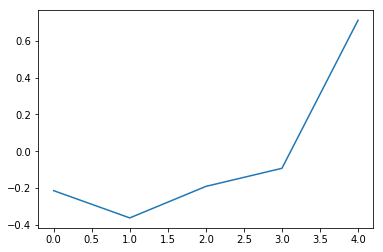

In [12]:
degree = 2
elements = 10000

real_data = utils.load_splitted_dataset(transactions_filepath, timesteps)
np.random.shuffle(real_data)
real_data = real_data[:elements]
(x_train_real, y_train_real), (x_test_real, y_test_real) = split_data(real_data, split, targets)

linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=degree)
x_train_real_ = polynomial_features.fit_transform(x_train_real)
linear_regressor.fit(x_train_real_, y_train_real)
x_test_real_ = polynomial_features.fit_transform(x_test_real)
print('real_data score: ', linear_regressor.score(x_test_real_, y_test_real))

scores = []
for filepath in generated_data_filepaths:
    generated_data = np.load(filepath)[:elements]
    (x_train, y_train), (x_test, y_test) = split_data(generated_data, split, targets)
    x_train_ = polynomial_features.fit_transform(x_train)
    linear_regressor.fit(x_train_, y_train)
    x_test_ = polynomial_features.fit_transform(x_test)
    score = regressor.score(x_test, y_test)
    scores.append(score)
    print('generated_data score: ', score)
    
plt.plot(scores)
plt.show()